1.1 Monte Carlo Simulation
A method of estimating the value of an unknown quantity using the principles of inferential statistics.
We take the population and then we sample it by drawing a proper subset. And then we make
an inference about the population based upon some set of statistics we do on the sample.
And, the key fact that makes them work, that if we choose the sample at random, the sample will
tend to exhibit the same properties as the population from which it is drawn.

1.2 Option Pricing Techniques
As with other option pricing techniques Monte Carlo methods are used to price options using what
is essentially a three step process.

Step 1: Simulate potential price paths of the underlying asset.

Step 2: Calculate the option payoff for each of these price paths.

Step 3: Average the payoff and discount back to today to determine the option price.

2 Simulating Asset Prices
Next, we will simulate the asset price at maturity ST . Following Black-Scholes-Merton where the
underlying follows under risk neutrality, a geometric Brownian motion with a stochastic differential
equation (SDE) is given as

$ dS_{t} = rS_{t}dt + \sigma S_{t}dW_{t}$

where $S_{t}$ is the price of the underlying at time t, $\sigma$ is constant volatility, r is the constant risk-free
interest rate and W is the brownian motion.

Applying Euler discretization of SDE, we get

$ S_{t+\delta{t}} = S_{t} ∗ (1 + r \delta{t} + \sigma \sqrt{δt}W_{t}) $ 

The variable w is a standard normally distributed random variable, 0 < δt < T, time interval. It
also holds 0 < t T with T the final time horizon.



3 $\textbf Asian\ Options $ An Asian option is an option where the payoff depends on the average price of the underlying asset over a certain period of time. Averaging can be either be Arithmetic or Geometric. There are two types of Asian options: fixed strike, where averaging price is used in place of underlying price; and fixed price, where averaging price is used in place of strike.

We’ll now price a fixed strike arthmetic average option using Monte Carlo simulation. 

$\textbf The\ payoff$ of the call and put options is given by 

$C_{T} = max(0, \frac{1}{T}\sum_{i=1}^{T}S_{i}-K) $
$P_{T} = max(0, K-\frac{1}{T}\sum_{i=1}^{T}S_{i}) $

$C_{T} = max(0, S_{Avg}-K) $

$P_{T} = max(0, K-S_{Avg}) $

where SAvg is the average price of the underlying asset over the life of the option. To price an
option using a Monte Carlo simulation we use a risk-neutral valuation, where the fair value for a
derivative is the expected value of its future payoff. So at any date before maturity, denoted by t ,
the option’s value is the present value of the expectation of its payoff at maturity, T.

$C_{t}= PV(E[max(0, S_{Avg}−K)]) $

$P_{t}= PV(E[max(0, K-S_{Avg})]) $

Under the risk-neutral framework, we assume the asset is going to earn, on average, the risk-free
interest rate. Hence, the option value at time t would simply be the discounted value of the expected
payoff.

$\textbf The\ value\ $ of Asian call and put option for a fixed strike price at time t

$C_{t} =\exp^{r(T-t)} max(0, S_{Avg}-K) $

$P_{t} =\exp^{r(T-t)} max(0, K-S_{Avg}) $

4 $\textbf lookback\ option$, The contract that pays this is an example of a lookback option, an option that pays off some  function of the realized maximum and/or minimum of the underlying asset over some prescribed period.

$\textbf Types\ of\ payoff $

For the basic lookback contracts, the payoff comes in two varieties, like the Asian option.

The rate and the strike option, also called the fixed strike and the floating strike respectively.

These have payoffs that are the same as vanilla options except that in the strike option the vanilla exercise price is replaced by the maximum. In the rate option it is the asset value in the vanilla option that is replaced bythe maximum.

$\textbf The\ payoff\ $ of lookback  call and put option for a fixed strike price

$C_{T} = max(0, S_{max}-K) $

$P_{T} = max(0, K-S_{min}) $

$\textbf The\ payoff\ $ of lookback  call and put option for a floating strike price

$C_{T} = max(0, S_{T}-S_{min}) $

$P_{T} = max(0, S_{max}-S_{T}) $

Under the risk-neutral framework, we assume the asset is going to earn, on average, the risk-free
interest rate. Hence, the option value at time t would simply be the discounted value of the expected
payoff.

$\textbf The\ value\ $ of lookback  call and put option for a floating strike price at time t

$C_{t} = \exp^{r(T-t)} max(0, S_{max}-K) $

$P_{t} = \exp^{r(T-t)} max(0, K-S_{min}) $

$\textbf The\ value\ $ of lookback  call and put option for a fixed strike price at time t

$C_{t} = \exp^{r(T-t)} max(0, S_{T}-S_{min}) $

$P_{t} = \exp^{r(T-t)} max(0, S_{max}-S_{T}) $


Now, let's use Monte Carlo simulation to construct an option pricing class in Python, Class name 

MonteCarloOptionPricing(S0:float, strike:float, rate:float, sigma:float, dte:int, nsim:int, timesteps)

The parameters of the class are explained as follows 

$\textbf S0$ : Initial stock price

$\textbf strik$ : Strike price

$\textbf rate$ : Risk-free interest rate

$\textbf sigma$ : Volatility

$\textbf dte$ : Time to expiration

$\textbf timesteps$ : Time steps

$\textbf nsim$ : Number of simulations

The methods of a class are as follows

$\textbf psuedorandomnumber$ : Generate pseudo random numbers

$\textbf simulatepath$ : path simulation

Euro-vanilla option

$\textbf vanillaoption$ : Return an array

$\textbf vanillaoption[0]$ :Call option price

$\textbf vanillaoption[1]$ :Put option price

Asian option with a fixed strike price

$\textbf asianoption$ : Return an array

$\textbf asianoption[0]$ :Call option price

$\textbf asianoption[1]$ :Put option price

Lookback option with a fixed strike price

$\textbf fixlkoption$ : Return an array

$\textbf fixlkoption[0]$ :Call option price

$\textbf fixlkoption[1]$ :Put option price

Lookback option with floating strike price

$\textbf floatlkoption$ : Return an array

$\textbf floatlkoption[0]$ :Call option price

$\textbf floatlkoption[1]$ :Put option price

$\textbf Barrier option$ : Return an array

In [1]:
# import pandas numpy matplotlib.pyplot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set max row to 300
pd.set_option("display.max_rows", 300)

class MonteCarloOptionPricing:
    '''Monte Carlo Option Pricing Engine'''
    def __init__(self, S0:float, strike:float, rate:float, sigma:float, dte:int, nsim:int, timesteps:int=252) -> float:
        self.S0 = S0        # Initial stock price
        self.K = strike     # Strike price
        self.r = rate       # Risk-free interest rate
        self.sigma = sigma  # Volatility
        self.T = dte        # Time to expiration
        self.ts = timesteps # Time steps
        self.N = nsim       # Number of simulations

    @property
    def psuedorandomnumber(self):
        '''generate psuedo random numbers'''
        return np.random.standard_normal(self.N)

    @property
    def simulatepath(self):
        '''simulate price path'''
        np.random.seed(2024)
        # define dt
        dt = self.T/self.ts
        # simulate path
        S = np.zeros((self.ts, self.N))
        S[0] = self.S0
        for i in range(0, self.ts-1):
            w = self.psuedorandomnumber
            S[i+1] = S[i] * (1+ self.r*dt + self.sigma * np.sqrt(dt)*w)
        return S
    
    @property
    def vanillaoption(self):
        '''calculate vanilla option payoff'''
        S = self.simulatepath
        # calculate the discounted value of the expeced payoff
        vanilla_call = np.exp(-self.r*self.T) * np.mean(np.maximum(0, S[-1]-self.K))
        vanilla_put = np.exp(-self.r*self.T) * np.mean(np.maximum(0, self.K-S[-1]))
        return [round(vanilla_call,4), round(vanilla_put,4)]
    
    @property
    def asianoption(self):
        '''calculate asian option payoff'''
        S = self.simulatepath
        # average the price across days
        A = S.mean(axis=0)
        # calculate the discounted value of the expeced payoff
        asian_call = np.exp(-self.r*self.T) * np.mean(np.maximum(0, A-self.K))
        asian_put = np.exp(-self.r*self.T) * np.mean(np.maximum(0, self.K-A))
        return [round(asian_call,4), round(asian_put,4)]
    @property
    def fixlkoption(self):
        '''calculate fix lookback option payoff'''
        S = self.simulatepath
        # calculate the discounted value of the expected payoff
        fixlk_call = np.exp(-self.r*self.T) * np.mean(np.maximum(S.max(axis=0)-self.K, 0))
        fixlk_put = np.exp(-self.r*self.T) * np.mean(np.maximum(self.K-S.min(axis=0), 0))
        return [round(fixlk_call,4), round(fixlk_put,4)]

    @property
    def floatlkoption(self):
        '''calculate float lookback option payoff'''
        S = self.simulatepath
        # calculate the discounted value of the expected payoff
        floatlk_call = np.exp(-self.r*self.T) * np.mean(np.maximum(S[-1]-S.min(axis=0), 0))
        floatlk_put = np.exp(-self.r*self.T) * np.mean(np.maximum(S.max(axis=0)-S[-1], 0))
        return [round(floatlk_call,4), round(floatlk_put,4)]


Now give the initial value, Todayís stock price S0= 100, Strike E= 100, Time to expiry (T-t) = 1 year, volatility 20%, constant risk-free interest rate r= 5%, Run 100000 Monte Carlo simulations to calculate the price of the Asian option and the lookback option

In [42]:
# instantiate
mc = MonteCarloOptionPricing(100,100,0.05,0.2,1,100000)

# Calculate the value of the fix strick price Asian option
print(f"fix strick price Asian Call Option Value is {mc.asianoption[0]}")
print(f"fix strick price Asian Put Option Value is {mc.asianoption[1]}")

# Calculate the value of fix strick price lookback options
print(f"fix strick price lookback Call Option Value is {mc.fixlkoption[0]}")
print(f"fix strick price lookback Put Option Value is {mc.fixlkoption[1]}")

# Calculate the value of floatings strick price lookback options
print(f"floating strick price lookback Call Option Value is {mc.floatlkoption[0]}")
print(f"floating strick price lookback Put Option Value is {mc.floatlkoption[1]}")

fix strick price Asian Call Option Value is 5.7251
fix strick price Asian Put Option Value is 3.3246
fix strick price lookback Call Option Value is 18.2908
fix strick price lookback Put Option Value is 11.7403
floating strick price lookback Call Option Value is 16.645
floating strick price lookback Put Option Value is 13.3861


Through 100,000 Monte Carlo simulations, the price of the underlying asset today is 100, the strike price is 100, the risk-free interest rate is 0.05, the volatility is 0.2, the term is 1 year, there are 252 trading days in a year, and $\delta$ t is $\frac{1}{252}$ of a day. 

It can be calculated that the call option price of the fix strick price Asian option is $\textbf {5.7251}$ and the put option price is $\textbf{3.3246} $ 

It can be calculated that the call option price of the fix strick price lookback option is $\textbf {18.2908}$ and the put option price is $\textbf{11.7403} $ 

It can be calculated that the call option price of the floating strick price lookback option is $\textbf {16.645}$ and the put option price is $\textbf{13.3861} $ 

By comparison, we can see that the price of Asian options is lower than that of lookback options, whether it is call option or put. The main reason is that the payoff method of Asian option adopts the average price as the settlement price when the option expires, which reduces the risk brought by underlying asset price fluctuations, the return of the look back option is greatly affected by the volatility, If the Option type is the same, we can see that the Call Option value is higher than the Put Option value.

Take vanilla options, for example, Let's look at the effect of changes in the spot price of the underlying asset $S_{T}$ on the payoff

Text(0.5, 0.98, 'Option Payoff at Maturity')

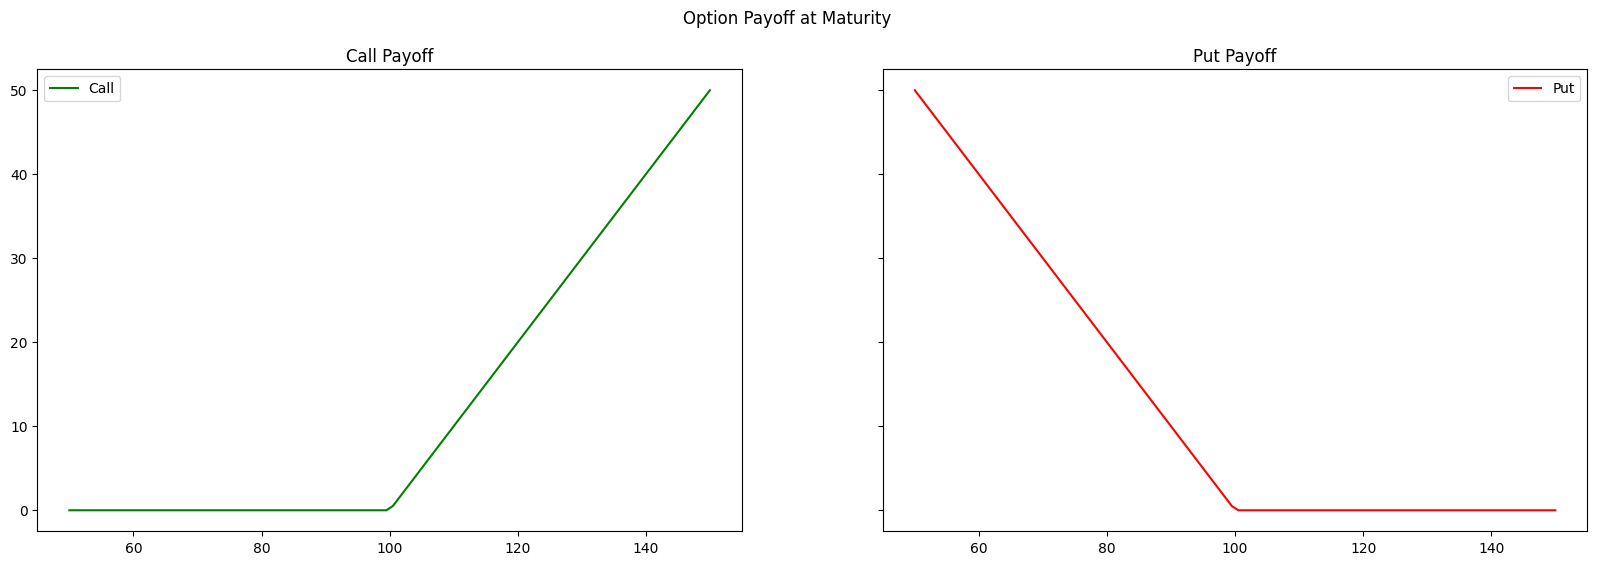

In [3]:
# range of spot prices
sT= np.linspace(50,150,100)
# visualize call and put price for range of spot prices
figure, axes = plt.subplots(1,2, figsize=(20,6), sharey=True)

title, payoff, color, label = ['Call Payoff', 'Put Payoff'], [np.maximum(sT-mc.K, 0), np.maximum(mc.K-sT, 0)], ['green', 'red'], ['Call', 'Put']
# plot payoff
for i in range(2):
    axes[i].plot(sT, payoff[i], color=color[i], label=label[i])
    axes[i].set_title(title[i])
    axes[i].legend()
figure.suptitle('Option Payoff at Maturity')

From the figure, we can see that the return of call option has no upper limit, and unlimited profits can be earned with the infinite rise of the underlying asset, while the return of put option has a upper limit. When the underlying asset drops to 0, the maximum profit can be earned as the strike price. From the perspective of earnings, it can be seen that call option has more potential to earn more profits than put option, that is, when the initial price S0, volatility $\sigma$, term (T-t),strike price E,risk-free interest rate r are all the same, Why call option is more expensive than put option

Next, let's simulate the impact of different volatility on Asian options, set $\sigma$ as 0%-100% equal to 100, and see the change of its price

In [4]:
def option_value():
    sigma = np.linspace(0,100,100) / 100
    AS_C = []
    AS_P = []
    FixLK_C = []
    FixLK_P = []
    FloatLK_C = []
    FloatLK_P = []
    for i in range(0,100):
        mc = MonteCarloOptionPricing(100,100,0.05,sigma[i],1,100000)
        AS_C.append(mc.asianoption[0])
        AS_P.append(mc.asianoption[1])
        FixLK_C.append(mc.fixlkoption[0])
        FixLK_P.append(mc.fixlkoption[1])
        FloatLK_C.append(mc.floatlkoption[0])
        FloatLK_P.append(mc.floatlkoption[1])
    data = {"fixasiancalloption": AS_C, "fixlookbackcalloption": FixLK_C, "floatlookbackcalloption": FloatLK_C,
            "fixasianputoption": AS_P, "fixlookbackputoption": FixLK_P, "floatlookbackputoption": FloatLK_P}
    return pd.DataFrame(data)

In [5]:
vdf = option_value()

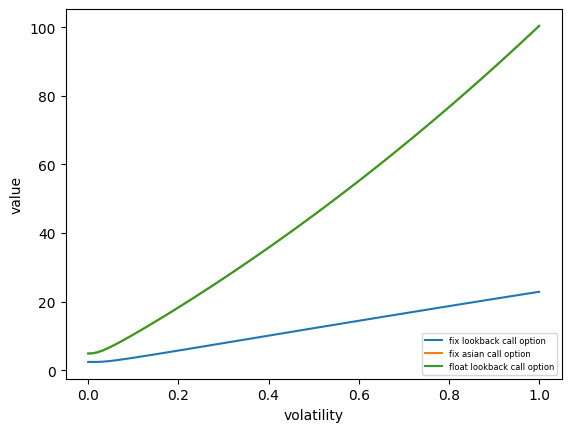

In [6]:
# range of volatility
x = np.linspace(0,100,100) / 100
# fix Asian call option value
y1 = vdf['fixasiancalloption']
# fix lookback  call option value
y2 = vdf['fixlookbackcalloption']
# float lookback  call option value
y3 = vdf['floatlookbackcalloption']
# Set the x - and Y-axis labels
plt.xlabel("volatility")
plt.ylabel("value")
# Plot the value of options with volatility
line1,=plt.plot(x,y1)
line2,=plt.plot(x,y2)
line3,=plt.plot(x,y2)
plt.legend(handles=[line1,line2,line3],labels=["fix lookback call option","fix asian call option","float lookback call option"],loc="lower right",fontsize=6)


Above is a view of how the price of the Asian option and the call option change with volatility

For lookback options, the price shows exponential growth. It can be intuitively seen that with the increase of $\sigma$, the call option price $V$ will increase, $dv$ increase relative to $d\sigma$. It can be seen that the change of volatility has a great impact on the call option price. When the volatility is relatively low, the change of the incremental volatility has a relatively small change in the incremental price; when the volatility is relatively high, the change of the incremental rate has a relatively large change in the incremental price

For Asian options, with the increase of $\sigma$, the call option price $V$ rises slowly, $dv$ has almost no change to $d\sigma$, it can be seen that the change of volatility has little impact on the call option price, while the change of volatility increment has almost no change on the change of price increment

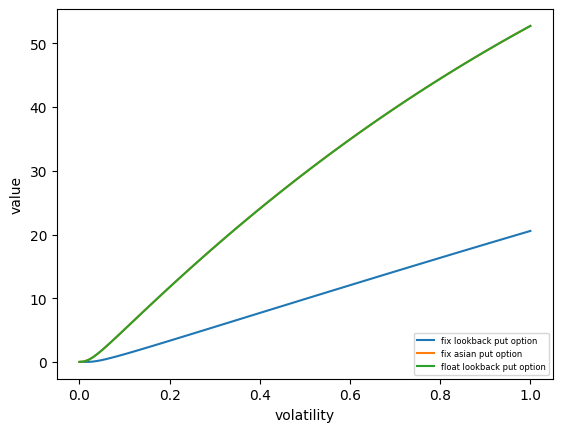

In [7]:
# range of volatility
x = np.linspace(0,100,100) / 100
# fix Asian call option value
y1 = vdf['fixasianputoption']
# fix lookback  call option value
y2 = vdf['fixlookbackputoption']
# float lookback  call option value
y3 = vdf['floatlookbackputoption']
# Set the x - and Y-axis labels
plt.xlabel("volatility")
plt.ylabel("value")
# Plot the value of options with volatility
line1,=plt.plot(x,y1)
line2,=plt.plot(x,y2)
line3,=plt.plot(x,y2)
plt.legend(handles=[line1,line2,line3],labels=["fix lookback put option","fix asian put option","float lookback put option"],loc="lower right",fontsize=6)


Above is a view of how the price of the Asian put option and the lookback put option change with volatility

For lookback options, It can be intuitively seen that with the increase of $\sigma$, the put option price $V$ will increase, but $dv$ decreases relative to $d\sigma$. It can be seen that the change of volatility has a great impact on the put option price. When the volatility is relatively low, the change of the incremental rate has a relatively large change in the incremental price; when the volatility is relatively high, the change of the incremental volatility has a relatively small change in the incremental price

For Asian options, with the increase of $\sigma$, the put option price $V$ rises slowly, $dv$ has almost no change to $d\sigma$, it can be seen that the change of volatility has little impact on the put option price, while the change of volatility increment has almost no change on the change of price increment

Other things being equal, how does a change in the initial asset value S0 affect the value of the option

In [8]:
def option_value_to_s0():
    S0 = np.linspace(50,150,10)
    AS_C = []
    AS_P = []
    FixLK_C = []
    FixLK_P = []
    FloatLK_C = []
    FloatLK_P = []
    for i in range(0,10):
        mc = MonteCarloOptionPricing(S0[i],100,0.05,0.2,1,100000)
        AS_C.append(mc.asianoption[0])
        AS_P.append(mc.asianoption[1])
        FixLK_C.append(mc.fixlkoption[0])
        FixLK_P.append(mc.fixlkoption[1])
        FloatLK_C.append(mc.floatlkoption[0])
        FloatLK_P.append(mc.floatlkoption[1])
    data = {"fixasiancalloption": AS_C, "fixlookbackcalloption": FixLK_C, "floatlookbackcalloption": FloatLK_C,
            "fixasianputoption": AS_P, "fixlookbackputoption": FixLK_P, "floatlookbackputoption": FloatLK_P}
    return pd.DataFrame(data)

In [9]:
vts = option_value_to_s0()

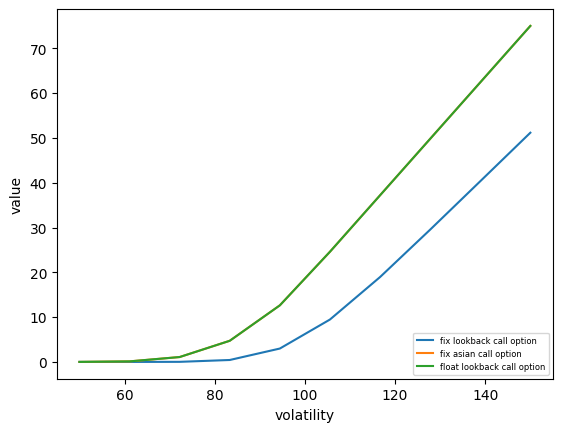

In [10]:
# range of volatility
x = np.linspace(50,150,10)
# fix Asian call option value
y1 = vts['fixasiancalloption']
# fix lookback  call option value
y2 = vts['fixlookbackcalloption']
# float lookback  call option value
y3 = vts['floatlookbackcalloption']
# Set the x - and Y-axis labels
plt.xlabel("volatility")
plt.ylabel("value")
# Plot the value of options with volatility
line1,=plt.plot(x,y1)
line2,=plt.plot(x,y2)
line3,=plt.plot(x,y2)
plt.legend(handles=[line1,line2,line3],labels=["fix lookback call option","fix asian call option","float lookback call option"],loc="lower right",fontsize=6)


It can be seen from the drawing of call option that the impact of the initial asset price on the value of the option is proportional. The lower the initial asset price, the lower the value of the option; the higher the initial asset price, the higher the value of the option; the comparison between Asian option and lookback option shows that the initial asset of lookback option has a greater impact on the price

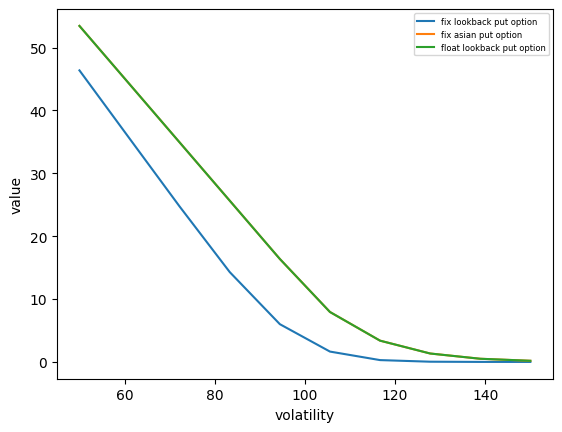

In [11]:
# range of volatility
x = np.linspace(50,150,10)
# fix Asian call option value
y1 = vts['fixasianputoption']
# fix lookback  call option value
y2 = vts['fixlookbackputoption']
# float lookback  call option value
y3 = vts['floatlookbackputoption']
# Set the x - and Y-axis labels
plt.xlabel("volatility")
plt.ylabel("value")
# Plot the value of options with volatility
line1,=plt.plot(x,y1)
line2,=plt.plot(x,y2)
line3,=plt.plot(x,y2)
plt.legend(handles=[line1,line2,line3],labels=["fix lookback put option","fix asian put option","float lookback put option"],loc="upper right",fontsize=6)


As can be seen from the drawing of put option, the impact of initial asset price on option value is inversely proportional. The lower the initial asset price, the higher the value of option; the higher the initial asset price, the lower the value of option; the comparison between Asian option and lookback option shows that lookback option initial asset has a greater impact on price

All other things being equal, how does the time step affect the price

In [12]:
def option_value_to_ts():
    ts = np.linspace(100,10000,100).astype(int)
    AS_C = []
    AS_P = []
    FixLK_C = []
    FixLK_P = []
    FloatLK_C = []
    FloatLK_P = []
    for i in range(0,100):
        mc = MonteCarloOptionPricing(100,100,0.05,0.2,1,100000,ts[i])
        AS_C.append(mc.asianoption[0])
        AS_P.append(mc.asianoption[1])
        FixLK_C.append(mc.fixlkoption[0])
        FixLK_P.append(mc.fixlkoption[1])
        FloatLK_C.append(mc.floatlkoption[0])
        FloatLK_P.append(mc.floatlkoption[1])
    data = {"fixasiancalloption": AS_C, "fixlookbackcalloption": FixLK_C, "floatlookbackcalloption": FloatLK_C,
            "fixasianputoption": AS_P, "fixlookbackputoption": FixLK_P, "floatlookbackputoption": FloatLK_P}
    return pd.DataFrame(data)

In [13]:
valuetots = option_value_to_ts()

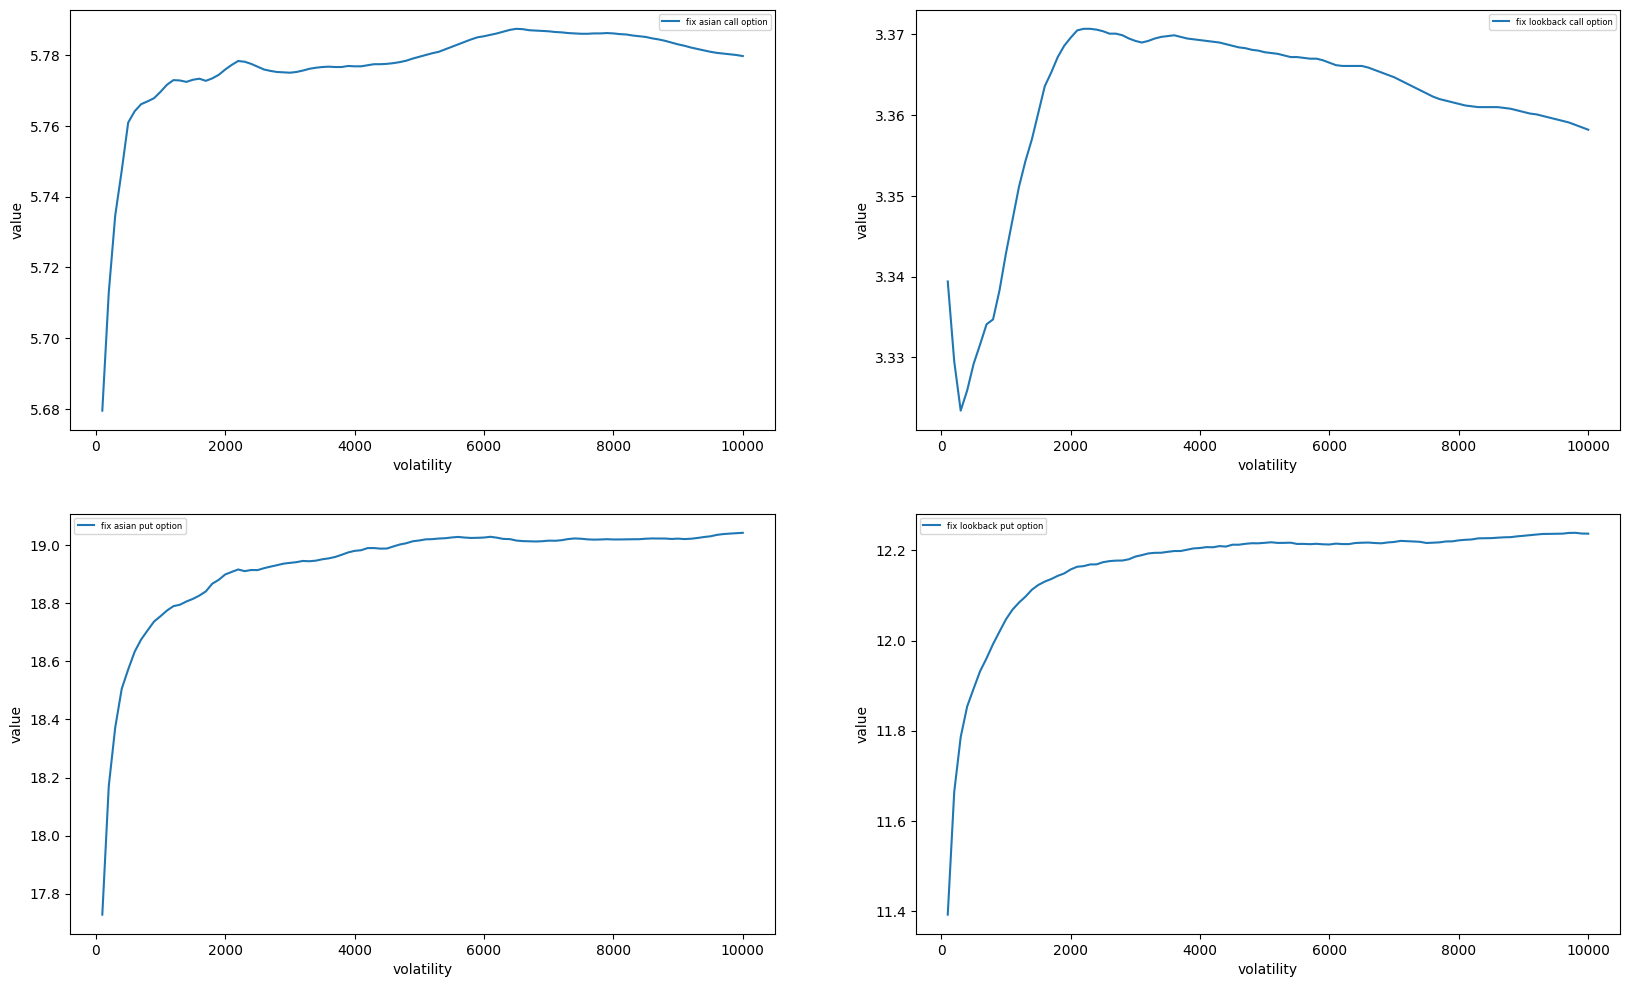

In [29]:
# range of volatility
x = np.linspace(100,10000,100).astype(int)
# fix Asian call option value
y1 = valuetots['fixasiancalloption']
# fix Asian putoption value
y2 = valuetots['fixasianputoption']
# fix lookback  call option value
y3 = valuetots['fixlookbackcalloption']
# fix lookback  put option value
y4 = valuetots['fixlookbackputoption']

plt.figure(figsize=(20,12))

plt.subplot(2,2,1,)
# Set the x - and Y-axis labels
plt.xlabel("volatility")
plt.ylabel("value")
plt.plot(x,y1)
plt.legend(labels=['fix asian call option'],loc="best",fontsize=6)

plt.subplot(2,2,2)
# Set the x - and Y-axis labels
plt.xlabel("volatility")
plt.ylabel("value")
plt.plot(x,y2)
plt.legend(labels=['fix lookback call option'],loc="best",fontsize=6)

plt.subplot(2,2,3)
# Set the x - and Y-axis labels
plt.xlabel("volatility")
plt.ylabel("value")
# Plot the value of options with volatility
plt.plot(x,y3)
plt.legend(labels=['fix asian put option'],loc="best",fontsize=6)

plt.subplot(2,2,4)
# Set the x - and Y-axis labels
plt.xlabel("volatility")
plt.ylabel("value")
plt.plot(x,y4)
plt.legend(labels=['fix lookback put option'],loc="best",fontsize=6)

As can be seen from the figure above, as the time step becomes longer, the price of options first rises to a certain price, and then fluctuates very little around this price, almost unchanged.The price is very little affected by the time step

Other things being equal, what does the interest rate do to the option price

In [39]:
def option_value_to_rate():
    rate = np.linspace(1,15,15).astype(int)/100
    AS_C = []
    AS_P = []
    FixLK_C = []
    FixLK_P = []
    FloatLK_C = []
    FloatLK_P = []
    for i in range(0,15):
        mc = MonteCarloOptionPricing(100,100,rate[i],0.2,1,100000)
        AS_C.append(mc.asianoption[0])
        AS_P.append(mc.asianoption[1])
        FixLK_C.append(mc.fixlkoption[0])
        FixLK_P.append(mc.fixlkoption[1])
        FloatLK_C.append(mc.floatlkoption[0])
        FloatLK_P.append(mc.floatlkoption[1])
    data = {"fixasiancalloption": AS_C, "fixlookbackcalloption": FixLK_C, "floatlookbackcalloption": FloatLK_C,
            "fixasianputoption": AS_P, "fixlookbackputoption": FixLK_P, "floatlookbackputoption": FloatLK_P}
    return pd.DataFrame(data)

In [40]:
vtr = option_value_to_rate()

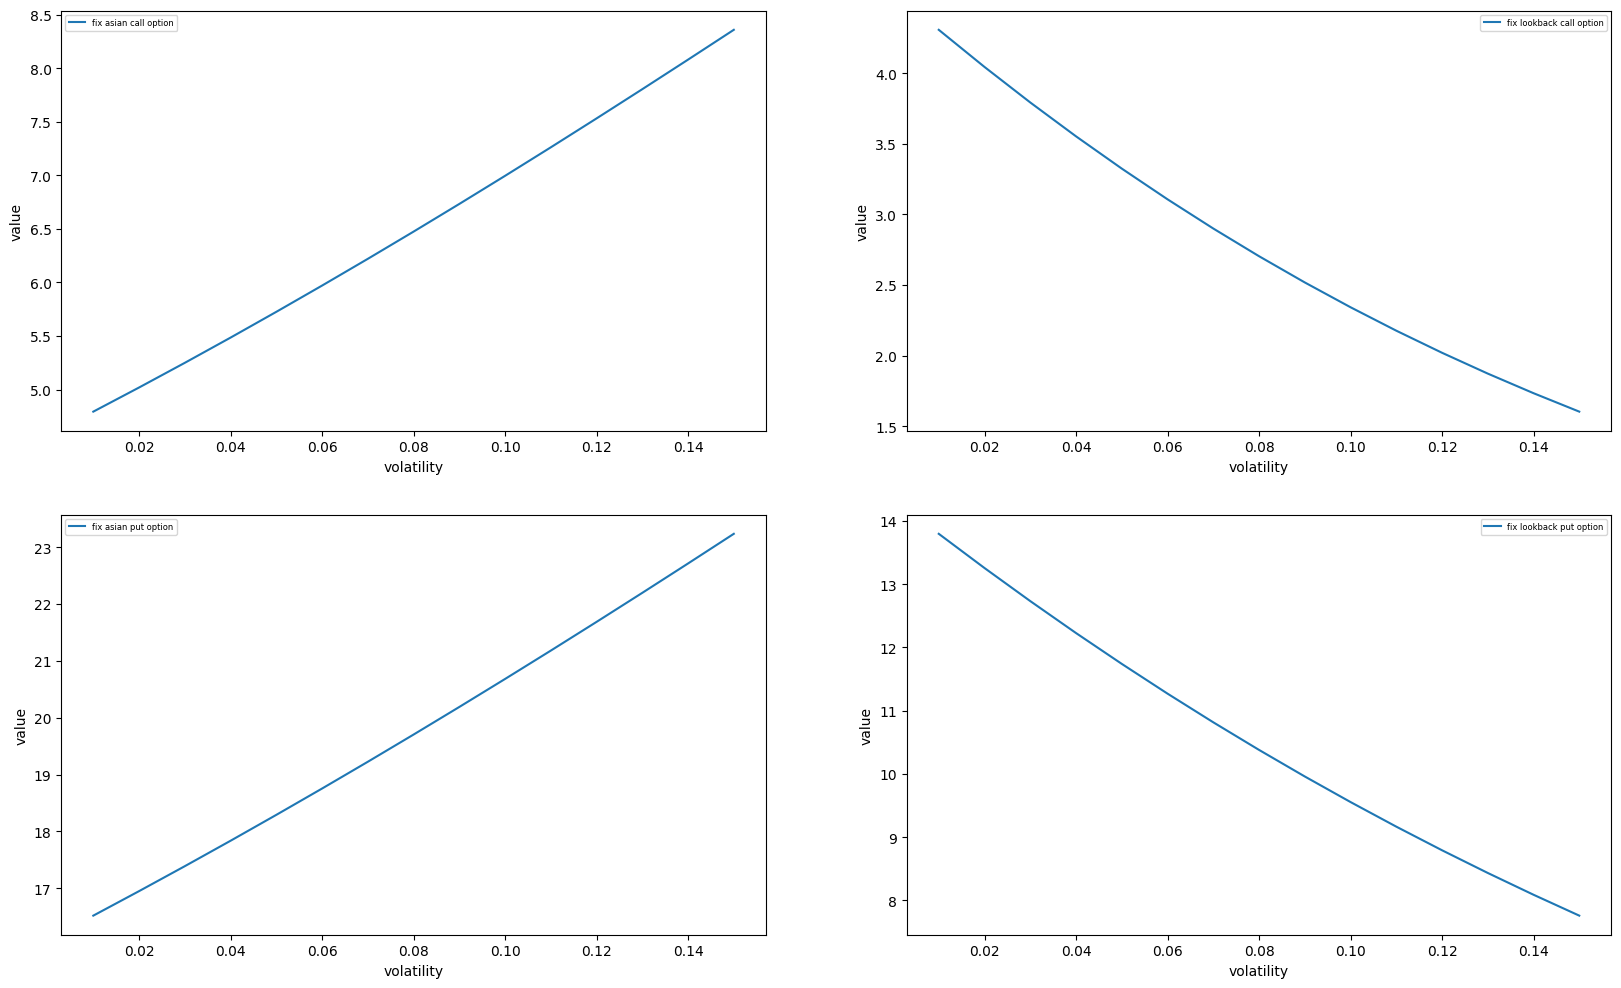

In [41]:
x = np.linspace(1,15,15).astype(int)/100
# fix Asian call option value
y1 = vtr['fixasiancalloption']
# fix Asian putoption value
y2 = vtr['fixasianputoption']
# fix lookback  call option value
y3 = vtr['fixlookbackcalloption']
# fix lookback  put option value
y4 = vtr['fixlookbackputoption']

plt.figure(figsize=(20,12))

plt.subplot(2,2,1,)
# Set the x - and Y-axis labels
plt.xlabel("volatility")
plt.ylabel("value")
plt.plot(x,y1)
plt.legend(labels=['fix asian call option'],loc="best",fontsize=6)

plt.subplot(2,2,2)
# Set the x - and Y-axis labels
plt.xlabel("volatility")
plt.ylabel("value")
plt.plot(x,y2)
plt.legend(labels=['fix lookback call option'],loc="best",fontsize=6)

plt.subplot(2,2,3)
# Set the x - and Y-axis labels
plt.xlabel("volatility")
plt.ylabel("value")
# Plot the value of options with volatility
plt.plot(x,y3)
plt.legend(labels=['fix asian put option'],loc="best",fontsize=6)

plt.subplot(2,2,4)
# Set the x - and Y-axis labels
plt.xlabel("volatility")
plt.ylabel("value")
plt.plot(x,y4)
plt.legend(labels=['fix lookback put option'],loc="best",fontsize=6)

As the risk-free rate goes up, the price of the call option goes up and the price of the put option goes down

The change of $dv$ relative to $dr$ Is that as the risk-free rate increases, the $dv$ of call option increases relative to $dr$ And the $dv$ of put option decreases relative to $dr$


references

$Monte\ Carlo\ methonds\ in\ finance$

$Paul\ Wilmott\ Introduces\ Quantitative\ Finance$

$Paul\ Wilmott\ On\ Quantitative\ Finance$